In [1]:
import os
import sys
import textwrap
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.sparse as sp
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit
from cornac.models import UserKNN, ItemKNN

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42
VERBOSE = False

System version: 3.12.3 (main, Feb  4 2025, 14:48:35) [GCC 13.3.0]
Cornac version: 2.3.0


In [2]:
movies = pd.read_csv('/home/naiaesnal/myproject/netflix_recommender/movies.csv')

# Convert 'ReleaseYear' to integer
movies['ReleaseYear'] = pd.to_numeric(movies['ReleaseYear'], errors='coerce')
movies['ReleaseYear'] = movies['ReleaseYear'].astype('Int64')

len(movies)

17770

In [3]:
movies.head()

,MovieId,ReleaseYear,MovieTitle
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [4]:
ratings = pd.read_csv('/home/naiaesnal/myproject/netflix_recommender/ratings.csv')
ratings['Rating'] = ratings['Rating'].astype('Int64')
ratings.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1
1,822109,5,2005-05-13,1
2,885013,4,2005-10-19,1
3,30878,4,2005-12-26,1
4,823519,3,2004-05-03,1


In [5]:
len(ratings)

100480507

In [6]:
df = ratings.drop(columns=['Date'])
df = ratings.rename(columns={'CustId': 'user', 'MovieId': 'item', 'Rating': 'rating'})
df = df[['user', 'item', 'rating']]


In [7]:
print(f"Number of ratings: {len(ratings)}")
print(f"Number of users: {ratings.CustId.nunique()}")
print(f"Number of movies: {movies.MovieId.nunique()}")

Number of ratings: 100480507
Number of users: 480189
Number of movies: 17770


In [8]:
df.rating.describe()

count    100480507.0
mean         3.60429
std         1.085219
min              1.0
25%              3.0
50%              4.0
75%              4.0
max              5.0
Name: rating, dtype: Float64

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.countplot(x="rating", data=df, ax=axes[0])
sns.boxplot(x="rating", data=df, ax=axes[1])

In [ ]:
# data sparsity, a mesure of how much data we do not observe
n_users = df.user.nunique()
n_movies = df.item.nunique()
n_ratings = len(df)
rating_matrix_size = n_users * n_movies
sparsity = 1 - n_ratings / rating_matrix_size

print(f"Number of users: {n_users}")
print(f"Number of items: {n_movies}")
print(f"Number of available ratings: {n_ratings}")
print(f"Number of all possible ratings: {rating_matrix_size}")
print("-" * 40)
print(f"Sparsity: {sparsity * 100.0:.2f}%")

Number of users: 480189
Number of items: 17770
Number of available ratings: 100480507
Number of all possible ratings: 8532958530
----------------------------------------
Sparsity: 98.82%


In [ ]:
item_rate_count = df.item.nunique()

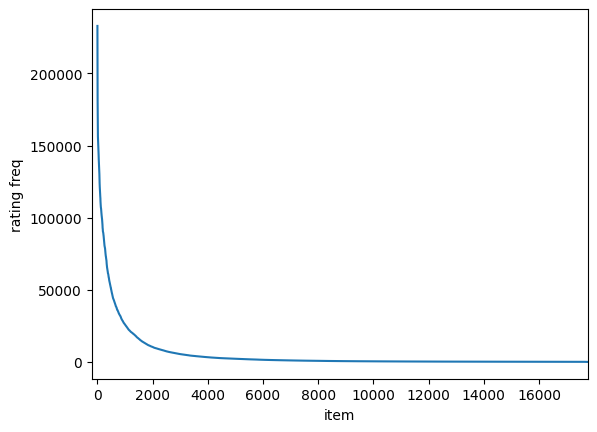

In [ ]:
plt.plot(item_rate_count.values)

plt.xlabel('item')
plt.ylabel('rating freq')

plt.xlim(-200, len(item_rate_count))

plt.show()
